In [12]:
import numpy as np
from hammer import Hammer
import matplotlib.pyplot as plt


In [30]:
num_step = 2**14
num_walk = 32
num_dim = 3

def log_prob_func(x, mu=np.zeros(num_dim), sig=np.ones(num_dim)):
    return -0.5 * np.sum(((x - mu) / sig)**2, axis=-1)

initial = np.zeros((num_walk, num_dim))
initial[:] = np.linspace(-1, 1, num_walk)[:, None]


In [31]:
hammer = Hammer("placeholder.h5", num_step, num_walk, num_dim, log_prob_func, (), 1.65, initial, frac_burn=0.2)

hammer.run()
print(hammer.rate_accept)


0.2478790283203125


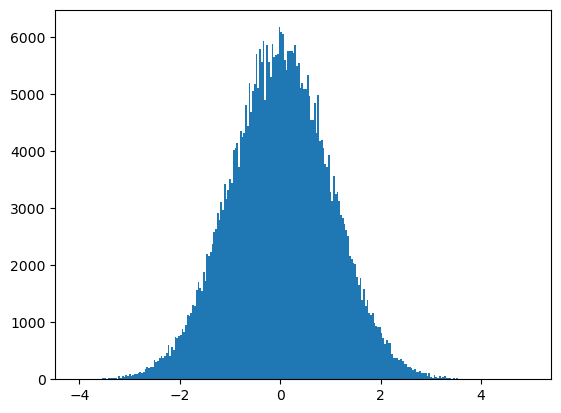

In [32]:
plt.hist(hammer.samples[:, :, 2].flatten(), bins=256);


In [36]:
rng = np.random.default_rng()

rng


Generator(PCG64) at 0x1087E8F20